In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df1 = pd.read_excel("Medibuddy Insurance Data Price.xlsx")
df1

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830
1334,PLC168904,18,female,31.920,2205.98080
1335,PLC168913,18,female,36.850,1629.83350
1336,PLC168922,21,female,25.800,2007.94500


In [3]:
df2 = pd.read_excel("Medibuddy insurance data personal details.xlsx")
df2

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [4]:
df = pd.merge(df1,df2, on = ["Policy no."],how = "inner")
df

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21,female,25.800,2007.94500,0,no,southwest


In [5]:
df.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [6]:
df.rename(columns = {'sex': 'Gender','age':'Age','bmi':'BMI','charges in INR': 'Amount_claimed',
                     'children':'Children','smoker': 'Smoker','region':'Region'},inplace = True)

In [7]:
# Adding new column BMI_range

def get_bmi(row):
    if row['BMI'] >= 15 and row['BMI'] <= 25 :
        return '15-25'
    elif row['BMI'] > 25 and row['BMI'] <= 35 :
        return '26-35'
    elif row['BMI'] > 35 and row['BMI'] <= 45 :
        return '36-45'
    elif row['BMI'] > 45 and row['BMI'] <= 55 :
        return '46-55'
    else:
        return 'Out of range'

# Apply the function across rows (axis=1)
df['BMI_range'] = df.apply(get_bmi, axis=1)

In [8]:
# Adding new column age_range

def get_age(row):
    if row['Age'] >= 18 and row['Age'] <= 29 :
        return 'Young [18-29]'
    elif row['Age'] > 29 and row['Age'] <= 49 :
        return 'Mid [30-49]'
    else:
        return 'Older [>=50]'

# Apply the function across rows (axis=1)
df['age_range'] = df.apply(get_age, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   Age             1338 non-null   int64  
 2   Gender          1338 non-null   object 
 3   BMI             1338 non-null   float64
 4   Amount_claimed  1338 non-null   float64
 5   Children        1338 non-null   int64  
 6   Smoker          1338 non-null   object 
 7   Region          1338 non-null   object 
 8   BMI_range       1338 non-null   object 
 9   age_range       1338 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 104.7+ KB


In [10]:
df.describe()   # Understanding the numeric columns

,Age,BMI,Amount_claimed,Children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


In [11]:
df.describe(include = object)    # Understanding the non-numeric columns

,Policy no.,Gender,Smoker,Region,BMI_range,age_range
count,1338,1338,1338,1338,1338,1338
unique,1338,2,2,4,4,3
top,PLC156898,male,no,southeast,26-35,Mid [30-49]
freq,1,676,1064,364,775,536


In [12]:
df.duplicated().sum()  # Checking duplicates

np.int64(0)

In [13]:
df.isnull().sum()    # Checking for null values

Policy no.        0
Age               0
Gender            0
BMI               0
Amount_claimed    0
Children          0
Smoker            0
Region            0
BMI_range         0
age_range         0
dtype: int64

## Exploratory Data Analysis (EDA)

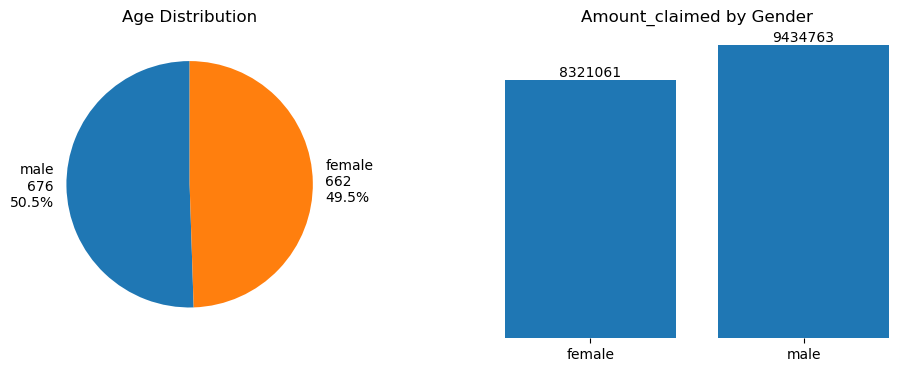

In [14]:
# 1. Does the gender of the person matter for the company as a constraint for extending policies?

fig, axes = plt.subplots(1,2,figsize = (12,4))

counts = df["Gender"].value_counts()
percentages = counts / counts.sum() * 100

labels = [
    f"{cat}\n{count}\n{pct:.1f}%"
    for cat,count, pct in zip(counts.index,counts,percentages)
]
# Axis 0 → Pie chart

axes[0].pie(counts,labels=labels,startangle=90)    
axes[0].set_title("Age Distribution")

gender_charges = df.groupby("Gender")["Amount_claimed"].sum()
# Axis 1 → Bar plot

bars = axes[1].bar(gender_charges.index,gender_charges.values)
axes[1].set_title("Amount_claimed by Gender")

# Remove Y-axis
axes[1].yaxis.set_visible(False)

# Add totals above bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

# Remove the square black border lines
for spine in axes[1].spines.values():
    spine.set_visible(False)


In [15]:
# Average cost based on gender
import math

AvgM = math.ceil(gender_charges['male']/len(df[df["Gender"]=="male"]))
AvgF = math.ceil(gender_charges['female']/len(df[df["Gender"]=="female"]))

print(f" Average cost per Male : Rs.{AvgM} \n Average cost per Female : Rs.{AvgF}")

 Average cost per Male : Rs.13957 
 Average cost per Female : Rs.12570


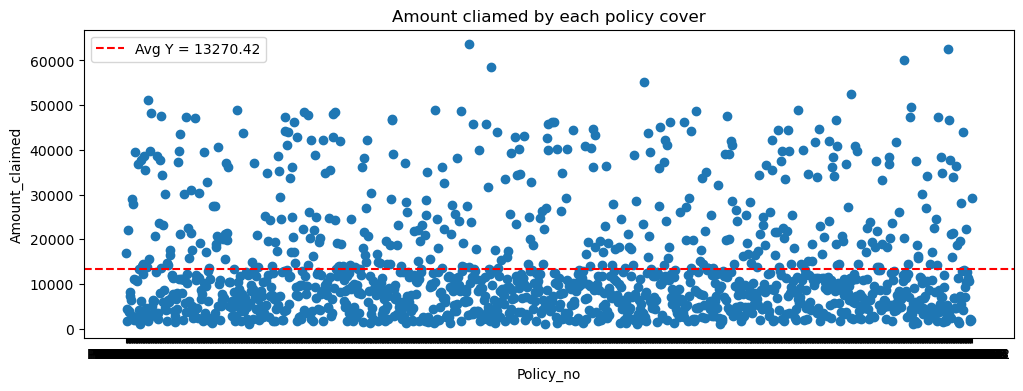

In [16]:
## 2. What is the average amount of money the company spent over each policy cover?

plt.figure(figsize=(12, 4))  # width=8 inches, height=4 inches

x = df["Policy no."]
y = df["Amount_claimed"]

# Calculate average of y
y_avg = y.mean()

plt.scatter(x,y)
# Set axis titles
plt.xlabel("Policy_no")  # X-axis label
plt.ylabel("Amount_claimed")  # Y-axis label

# Optional: set a plot title
plt.title("Amount cliamed by each policy cover")

# Plot average line
plt.axhline(y=y_avg, color='red', linestyle='--', label=f'Avg Y = {y_avg:.2f}')
plt.legend()
plt.show()


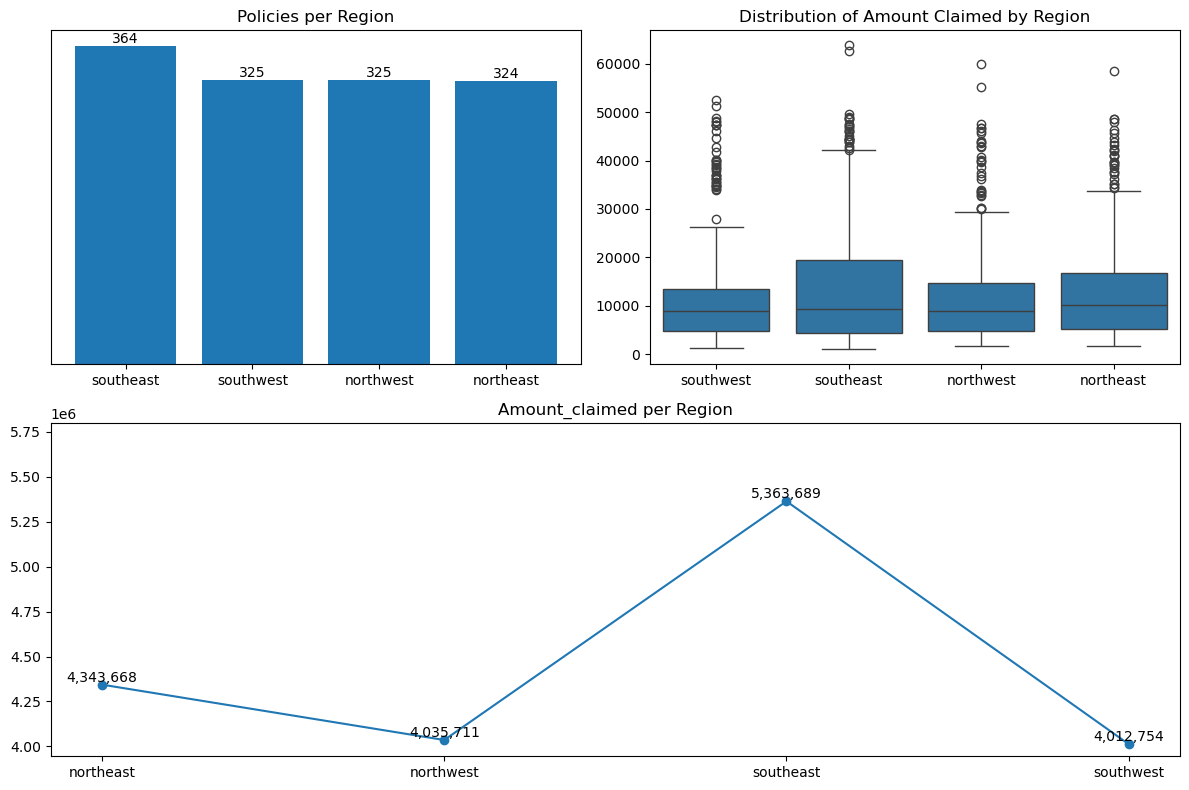

In [17]:
## 3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

Region_charges = df.groupby("Region")["Amount_claimed"].sum()

# Sample data
x = Region_charges.index
y = Region_charges.values

# Create figure
fig = plt.figure(figsize=(12, 8))

# Define GridSpec: 2 rows, 2 columns, with different sizes
gs = gridspec.GridSpec(
    nrows=2, ncols=2, 
    width_ratios=[1, 1],   # First row: left chart bigger
    height_ratios=[1, 1],  # Second row same height
    figure=fig
)

# First chart (top-left) --> Line chart

ax1 = fig.add_subplot(gs[1, :])
ax1.plot(x, y, marker='o')
plt.ylim(top = 5800000)

# Add data labels on each point
for i, j in zip(x, y):    
    plt.text(i, j , f"{int(j):,}", ha='center', va='bottom')
    
ax1.set_title("Amount_claimed per Region")


# Second chart (top-right) --> Bar chart

region_cnt = df['Region'].value_counts()

ax2 = fig.add_subplot(gs[0, 0])
a = ax2.bar(region_cnt.index, region_cnt.values)
plt.bar_label(a)

ax2.set_title("Policies per Region")

# Remove Y-axis
ax2.yaxis.set_visible(False)

# Third chart (bottom row, spanning both columns)

ax3 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=df, x="Region", y="Amount_claimed" ,ax= ax3)
ax3.set_title("Distribution of Amount Claimed by Region")
ax3.set_xlabel("")  # remove x-axis title
ax3.set_ylabel("")  # remove y-axis title

plt.tight_layout()
plt.show()

In [18]:
# Average cost based on gender
import math

AvgNE = math.ceil(Region_charges['northeast']/len(df[df["Region"]=="northeast"]))
AvgNW = math.ceil(Region_charges['northwest']/len(df[df["Region"]=="northwest"]))
AvgSE = math.ceil(Region_charges['southeast']/len(df[df["Region"]=="southeast"]))
AvgSW = math.ceil(Region_charges['southwest']/len(df[df["Region"]=="southwest"]))

print(f" Average cost per North_East Region : Rs.{AvgNE} \n Average cost North_West Region : Rs.{AvgNW}")
print(f" Average cost per South_East Region : Rs.{AvgSE} \n Average cost South_West Region : Rs.{AvgSW}")

 Average cost per North_East Region : Rs.13407 
 Average cost North_West Region : Rs.12418
 Average cost per South_East Region : Rs.14736 
 Average cost South_West Region : Rs.12347


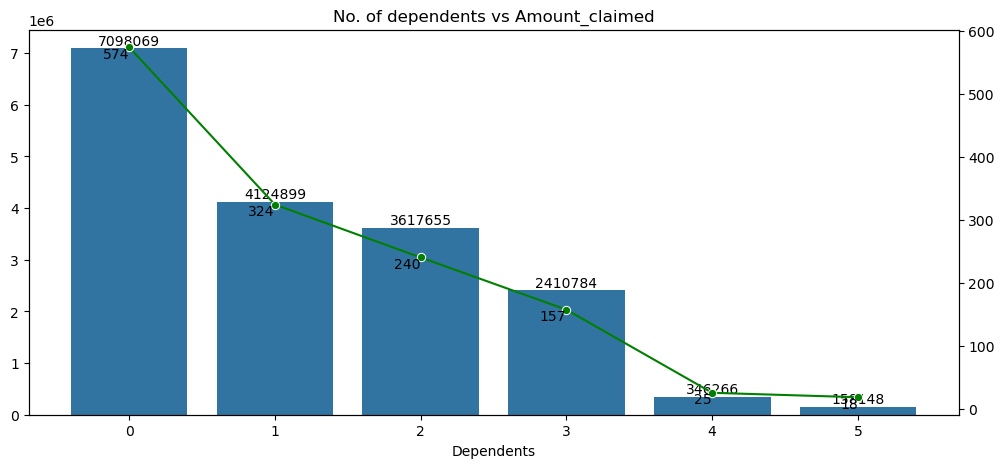

In [19]:
## 4. Does the no. of dependents make a difference in the amount claimed?

chi_amt = df.groupby('Children')['Amount_claimed'].sum()
chi_tot = df['Children'].value_counts()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar chart
sns.barplot(x=chi_amt.index, y=chi_amt.values, ax=ax1)

for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f"{int(p.get_height())}",
        ha="center",
        va="bottom"
    )

ax2 = ax1.twinx()
# Line chart (same axis)
sns.lineplot(x=chi_amt.index, y=chi_tot.values, ax=ax2, marker="o",color = 'green')
for x, y in zip(chi_amt.index, chi_tot.values):
    ax2.text(x,y,f"{y:.0f}",color="black",ha="right",va="top")

ax1.set_title("No. of dependents vs Amount_claimed")
ax1.set_xlabel("Dependents")
plt.show()

In [20]:
# Average cost based on gender
import math

Avg0 = math.ceil(chi_amt[0]/len(df[df["Children"]==0]))
Avg1 = math.ceil(chi_amt[1]/len(df[df["Children"]==1]))
Avg2 = math.ceil(chi_amt[2]/len(df[df["Children"]==2]))
Avg3 = math.ceil(chi_amt[3]/len(df[df["Children"]==3]))
Avg4 = math.ceil(chi_amt[4]/len(df[df["Children"]==4]))
Avg5 = math.ceil(chi_amt[5]/len(df[df["Children"]==5]))

print(f" Average cost per 0 dependents : Rs.{Avg0} \n Average cost per 1 dependent : Rs.{Avg1}")
print(f" Average cost per 2 dependents : Rs.{Avg2} \n Average cost per 3 dependents : Rs.{Avg3}")
print(f" Average cost per 4 dependents : Rs.{Avg4} \n Average cost per 5 dependents : Rs.{Avg5}")

 Average cost per 0 dependents : Rs.12366 
 Average cost per 1 dependent : Rs.12732
 Average cost per 2 dependents : Rs.15074 
 Average cost per 3 dependents : Rs.15356
 Average cost per 4 dependents : Rs.13851 
 Average cost per 5 dependents : Rs.8787


<Axes: xlabel='BMI', ylabel='Amount_claimed'>

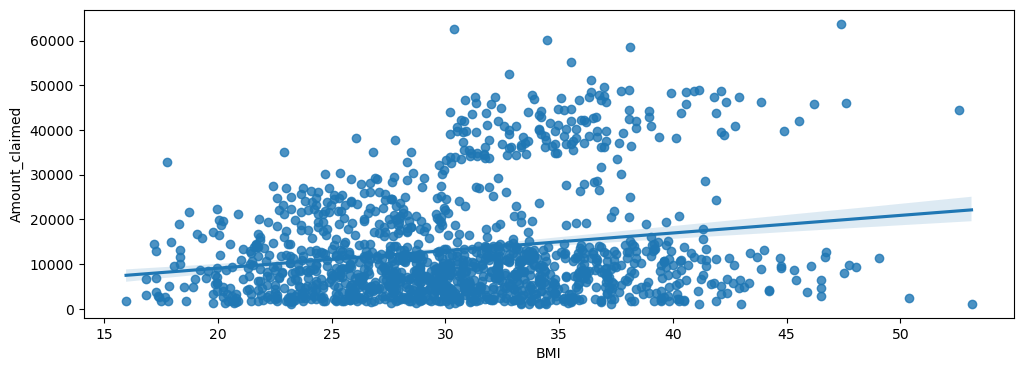

In [21]:
# 5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

fig = plt.figure(figsize = (12,4))
sns.regplot(x='BMI',y='Amount_claimed',data = df)

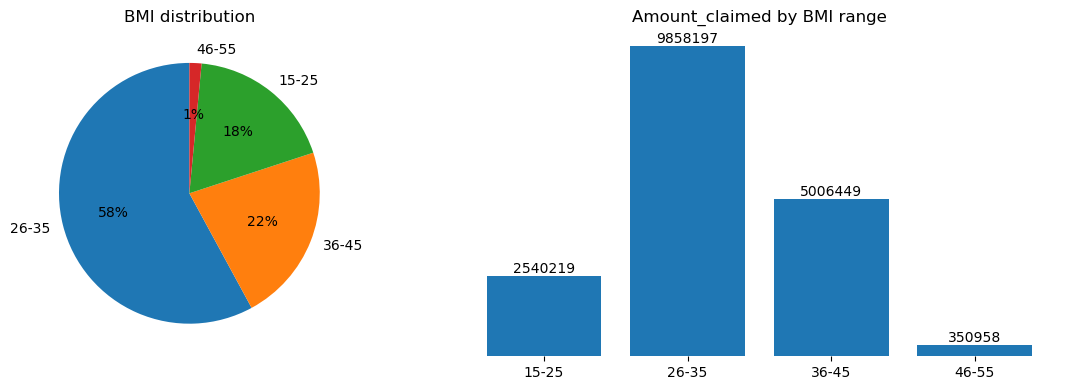

In [22]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

counts = df["BMI_range"].value_counts()

# Axis 0 → Pie chart

axes[0].pie(counts,labels = counts.index,autopct='%1.0f%%',startangle=90)    
axes[0].set_title("BMI distribution")

bmi_g = df.groupby('BMI_range')['Amount_claimed'].sum()
# Axis 1 → Bar plot

bars = axes[1].bar(bmi_g.index,bmi_g.values)
axes[1].set_title("Amount_claimed by BMI range")

# Remove Y-axis
axes[1].yaxis.set_visible(False)

# Add totals above bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

# Remove the square black border lines
for spine in axes[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [23]:
# Average cost based on gender
import math

Avg15 = math.ceil(bmi_g['15-25']/len(df[df["BMI_range"]=="15-25"]))
Avg26 = math.ceil(bmi_g['26-35']/len(df[df["BMI_range"]=="26-35"]))
Avg36 = math.ceil(bmi_g['36-45']/len(df[df["BMI_range"]=="36-45"]))
Avg46 = math.ceil(bmi_g['46-55']/len(df[df["BMI_range"]=="46-55"]))

print(f" Average cost per BMI_range 15-25 : Rs.{Avg15} \n Average cost BMI_range 26-35 : Rs.{Avg26}")
print(f" Average cost per BMI_range 36-45 : Rs.{Avg36} \n Average cost BMI_range 46-55 : Rs.{Avg46}")

 Average cost per BMI_range 15-25 : Rs.10285 
 Average cost BMI_range 26-35 : Rs.12721
 Average cost per BMI_range 36-45 : Rs.16914 
 Average cost BMI_range 46-55 : Rs.17548


Text(0.5, 1.0, 'Amount_claimed by smokers')

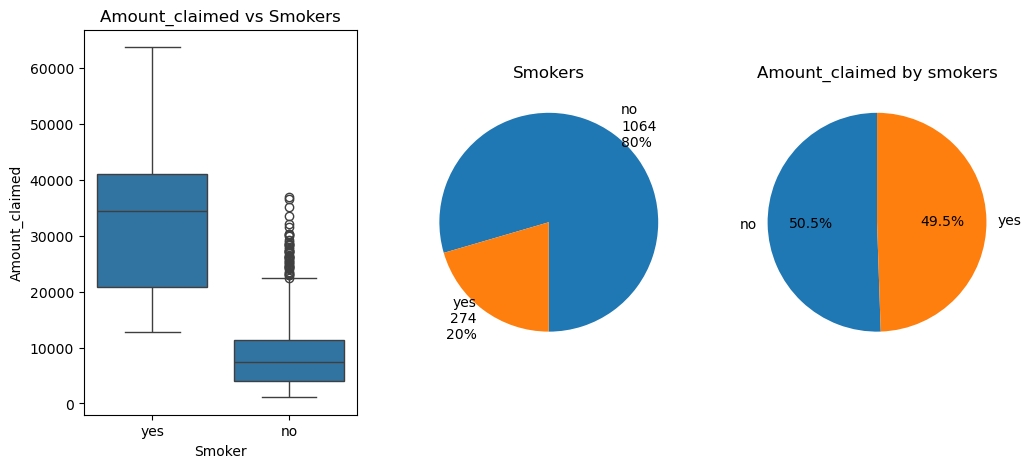

In [24]:
## 6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))


# Plot 1 on the left axis (axes[0]) --> box plot

ax= sns.boxplot(x='Smoker',y = 'Amount_claimed',data = df, ax=axes[0])
axes[0].set_title('Amount_claimed vs Smokers')

# Plot 2 in the middle (axes[1]) --> pie chart

counts = df["Smoker"].value_counts()
percentages = counts / counts.sum() * 100

labels = [
    f"{cat}\n{count}\n{pct:.0f}%"
    for cat,count, pct in zip(counts.index,counts,percentages)
]

axes[1].pie(counts,labels=labels,startangle=270)    
axes[1].set_title("Smokers")


# Plot 3 on the right side (axes[2]) --> pie chart

x = df.groupby('Smoker')["Amount_claimed"].sum()
axes[2].pie(x.values,labels = x.index,autopct='%1.1f%%', startangle=90)
axes[2].set_title("Amount_claimed by smokers")


<Axes: xlabel='Policy no.', ylabel='Amount_claimed'>

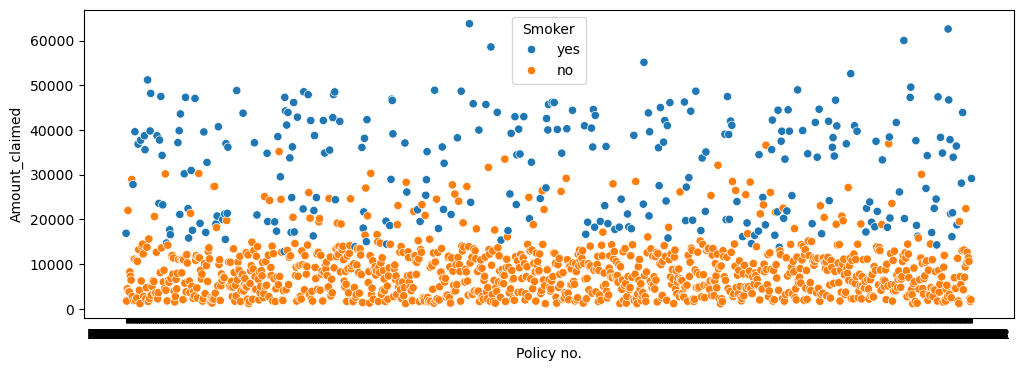

In [25]:
fig = plt.figure(figsize = (12,4))
sns.scatterplot(x='Policy no.',y= 'Amount_claimed',data = df,hue = 'Smoker')

In [26]:
AvgS = math.ceil(x['yes']/len(df[df["Smoker"]=="yes"]))
AvgNS = math.ceil(x['no']/len(df[df["Smoker"]=="no"]))

print(f" Average cost per Smoker : Rs.{AvgS} \n Average cost per Non-smoker : Rs.{AvgNS}")

 Average cost per Smoker : Rs.32051 
 Average cost per Non-smoker : Rs.8435


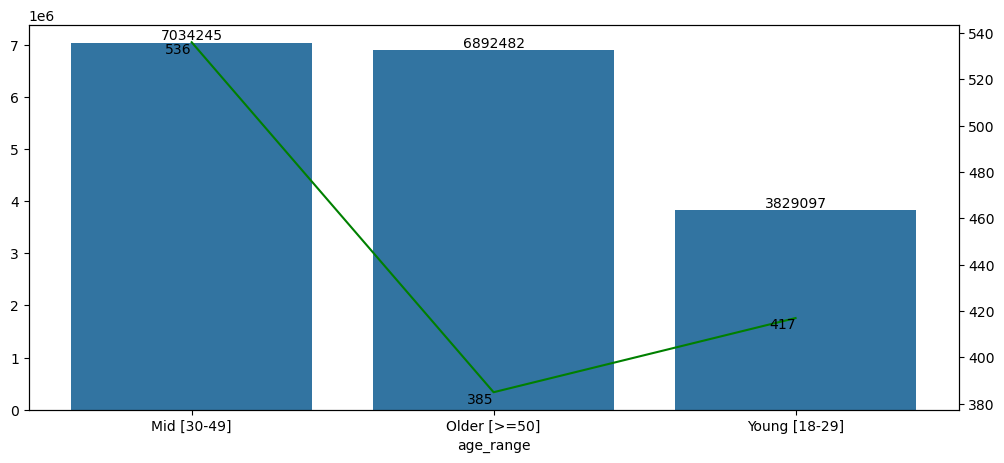

In [27]:
## 7. Does age have any barrier on the insurance claimed?

age_amt = df.groupby('age_range')['Amount_claimed'].sum()
age_tot = df['age_range'].value_counts()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Bar chart
sns.barplot(x=age_amt.index, y=age_amt.values, ax=ax1)

for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f"{int(p.get_height())}",
        ha="center",
        va="bottom"
    )

ax2 = ax1.twinx()
# Line chart (same axis)
sns.lineplot(x=age_tot.index, y=age_tot.values, ax=ax2,color = 'green')
for x, y in zip(age_tot.index, age_tot.values):
    ax2.text(x,y,f"{y:.0f}",color="black",ha="right",va="top")

In [31]:
# Average cost based on gender
import math

Avg18 = math.ceil(age_amt['Young [18-29]']/len(df[df["age_range"]=="Young [18-29]"]))
Avg30 = math.ceil(age_amt['Mid [30-49]']/len(df[df["age_range"]=="Mid [30-49]"]))
Avg50 = math.ceil(age_amt['Older [>=50]']/len(df[df["age_range"]=="Older [>=50]"]))

print(f" Average cost per Age_group 18-29 : Rs.{Avg18} \n Average cost per Age_group 30-49  : Rs.{Avg30}")
print(f" Average cost per Age_group >50 : Rs.{Avg50}")

 Average cost per Age_group 18-29 : Rs.9183 
 Average cost per Age_group 30-49  : Rs.13124
 Average cost per Age_group >50 : Rs.17903


<Axes: xlabel='BMI_range', ylabel='Amount_claimed'>

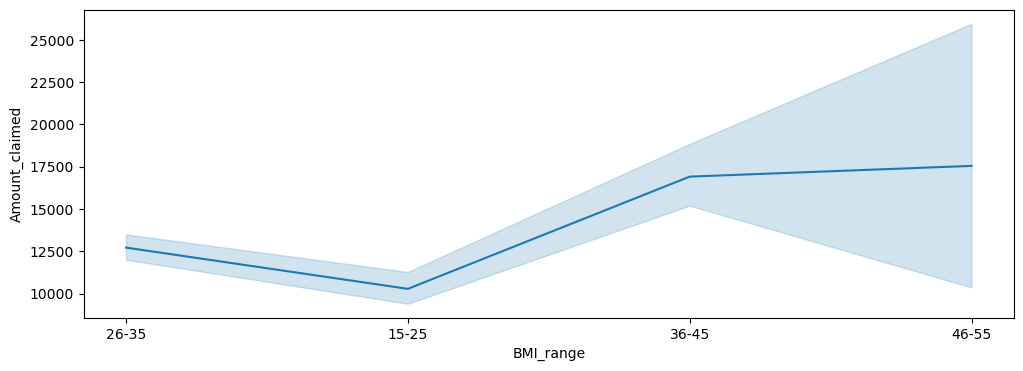

In [29]:
## 8. Can the company extend certain discounts after checking the health status (BMI) in this case?

fig = plt.figure(figsize = (12,4))
sns.lineplot(x='BMI_range',y = 'Amount_claimed',data = df)